варіант 3
Зображення з ефектом окулярів збережено у файлі: edited_draco.jpg


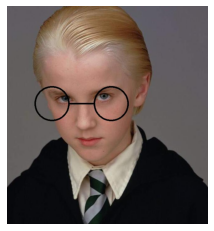

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

def create_image_with_glasses(image_folder_path, file_name, image_size, glasses_color, line_width):
    image_path = os.path.join(image_folder_path, file_name)
    img = plt.imread(image_path)
    edited_img = img.copy()
    
    width, height, _ = edited_img.shape
    center_x = width // 3
    center_y = height // 2
    
    radius = min(width, height) // 11
    new_radius = int(radius * 0.8)
    
    cv2.circle(edited_img, (center_x - int(width * 0.06), center_y - int(height * 0.05)), new_radius, glasses_color, thickness=line_width)
    cv2.circle(edited_img, (center_x + int(width * 0.15), center_y - int(height * 0.05)), new_radius, glasses_color, thickness=line_width)
    cv2.line(edited_img, (center_x - int(width * -0.001), center_y - int(height * 0.05)), (center_x + int(width * 0.09), center_y - int(height * 0.05)), glasses_color, thickness=line_width)

    edited_img = edited_img[(height - image_size[1]) // 2:(height + image_size[1]) // 2,
                            (width - image_size[0]) // 2:(width + image_size[0]) // 2]
    
    new_image_path = f'edited_{file_name}'
    plt.imsave(new_image_path, edited_img)
    
    return new_image_path

image_folder_path = 'D:/Навчання/ХПІ/Pyton/L5/Images/'
file_path = 'D:/Навчання/ХПІ/Pyton/L5/lab6.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

M = 'M'  
N = ord(M) % 5 + 1
print("варіант " + str(N))

file_name = df.loc[N - 1, 'file name']
image_size_str = df.loc[N - 1, 'image size']
image_size = tuple(map(int, image_size_str.split('x')))
glasses_color_text = df.loc[N - 1, 'glasses color']

color_dict = {
    'червоний': (0, 0, 255),
    'зелений': (0, 255, 0),
    'синій': (255, 0, 0),
}

glasses_color = color_dict.get(glasses_color_text.lower(), (0, 0, 0))
line_width = df.loc[N - 1, 'line width']

resulting_image_path = create_image_with_glasses(image_folder_path, file_name, image_size, glasses_color, line_width)
print(f"Зображення з ефектом окулярів збережено у файлі: {resulting_image_path}")

img = plt.imread(resulting_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


варіант 3
